# Project created by Shivani for classification of Breast Cancer using the Wisconsin Data-set

# Import Statements

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from plotly.subplots import make_subplots
from sklearn.metrics import f1_score, precision_score, accuracy_score, recall_score, balanced_accuracy_score

import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Model

# Exploratory Data Analysis begins here

In [2]:
df = pd.read_csv('wisconsin.csv')
                 
df.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0  ...         25.38          17.33           184.60      2019.0   
1  ...         24.99          23.41           158.80      1956.0   
2  ...         23.57          25.53           152.50      1709.0   
3  ...         14.91          26.50            98.87       567.7   
4  ...         22.54          16.67           152.20      1575.0   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   symmetry_worst  fractal_dimension_worst  
0          0.4601                  0.11890  
1          0.2750                  0.08902  
2          0.3613                  0.08758  
3          0.6638                  0.17300  
4          0.2364                  0.07678  

[5 rows x 32 columns]

In [3]:
df.describe().T.style.background_gradient(cmap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))

In [4]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [5]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

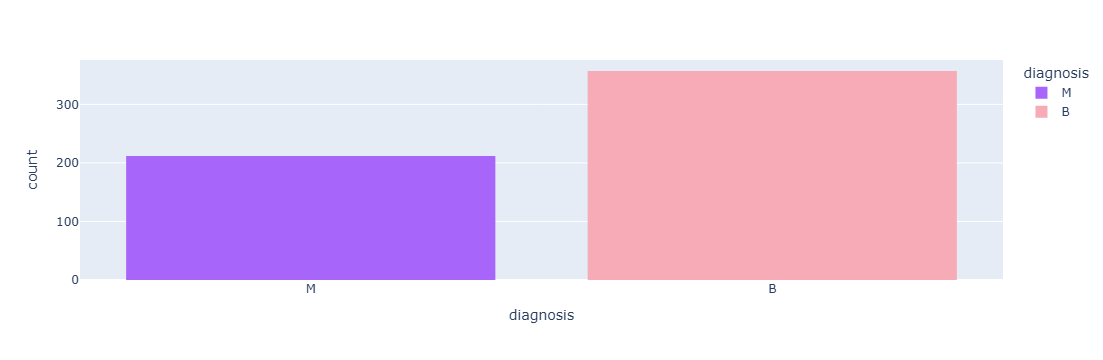

In [6]:
px.histogram(data_frame=df, x='diagnosis', color='diagnosis',color_discrete_sequence=['#A865f9','#f6abb6'])

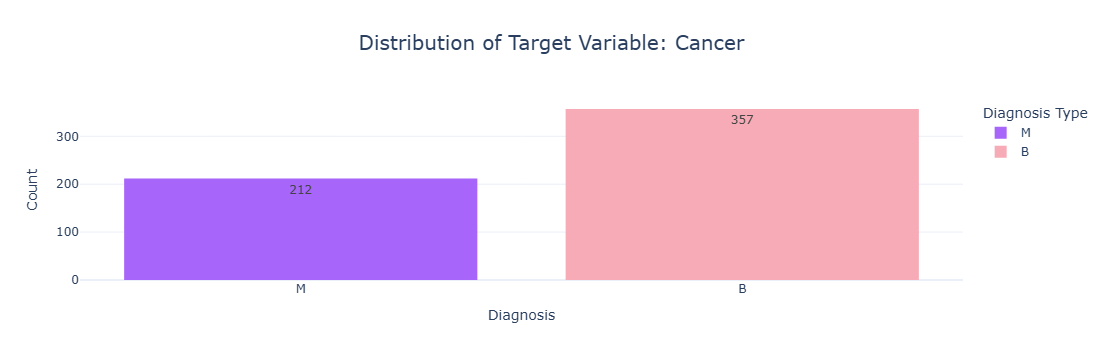

In [7]:
# Assuming df is your DataFrame
fig = px.histogram(
    data_frame=df, 
    x='diagnosis', 
    color='diagnosis',
    color_discrete_sequence=['#A865f9','#f6abb6'],
    title="Distribution of Target Variable: Cancer",  # Custom title for the plot
    labels={"diagnosis": "Diagnosis Type"},  # Custom label for the x-axis
    text_auto=True  # Display the count over the bars
)

# Update layout to make background transparent
fig.update_layout(
    title_font_size=20,  # Adjust the title font size
    title_x=0.5,  # Center the title
    xaxis_title="Diagnosis",  # Custom title for x-axis
    yaxis_title="Count",  # Custom title for y-axis
    template="plotly_white",  # Set a template for the plot
    plot_bgcolor='rgba(0,0,0,0)',  # Transparent plot background
    paper_bgcolor='rgba(0,0,0,0)'  # Transparent overall background
)

fig.show()


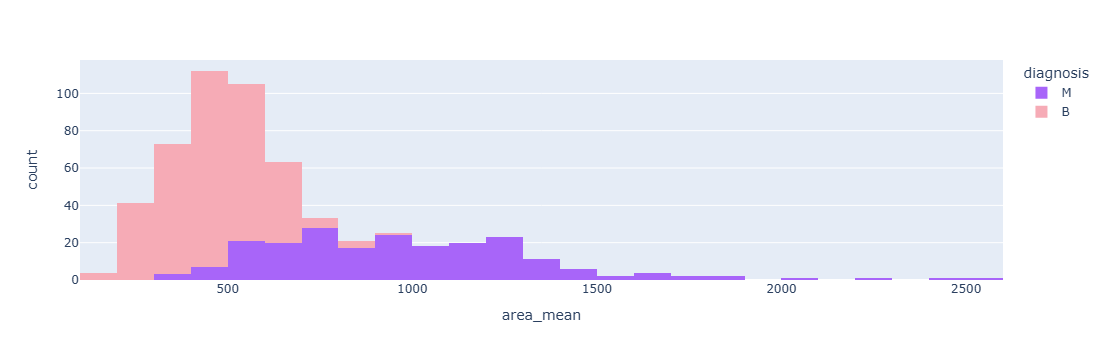

In [8]:
px.histogram(data_frame=df,x=df.area_mean,color='diagnosis',color_discrete_sequence=['#A865f9','#f6abb6'])


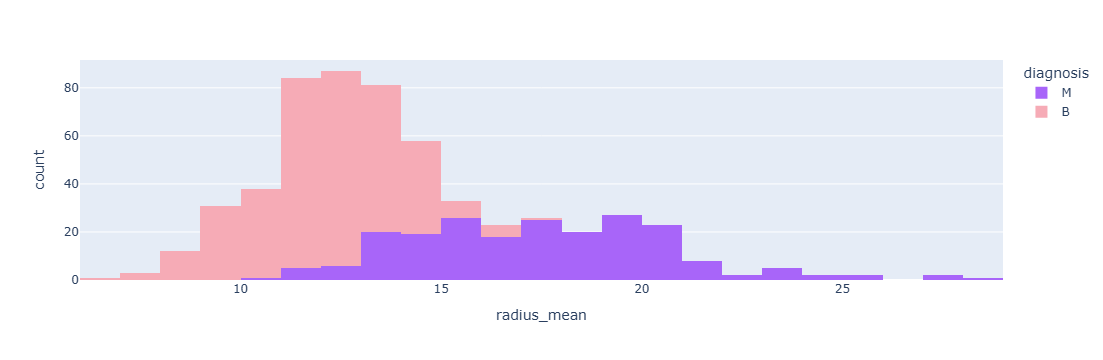

In [9]:
px.histogram(data_frame=df,x='radius_mean',color='diagnosis',color_discrete_sequence=['#A865f9','#f6abb6'])


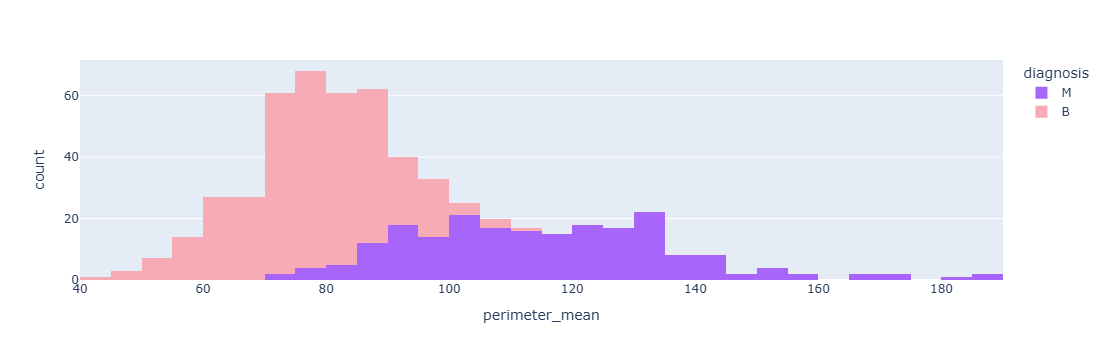

In [10]:
px.histogram(data_frame=df,x='perimeter_mean',color='diagnosis',color_discrete_sequence=['#A865f9','#f6abb6'])


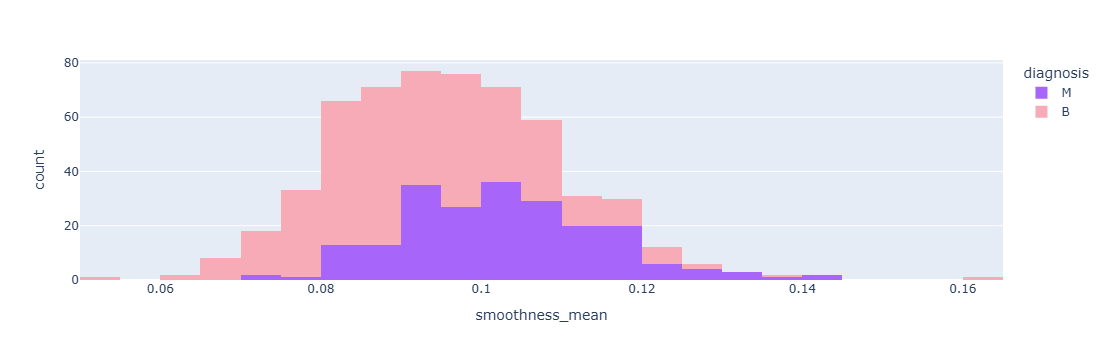

In [11]:
px.histogram(data_frame=df,x='smoothness_mean',color='diagnosis',color_discrete_sequence=['#A865f9','#f6abb6'])


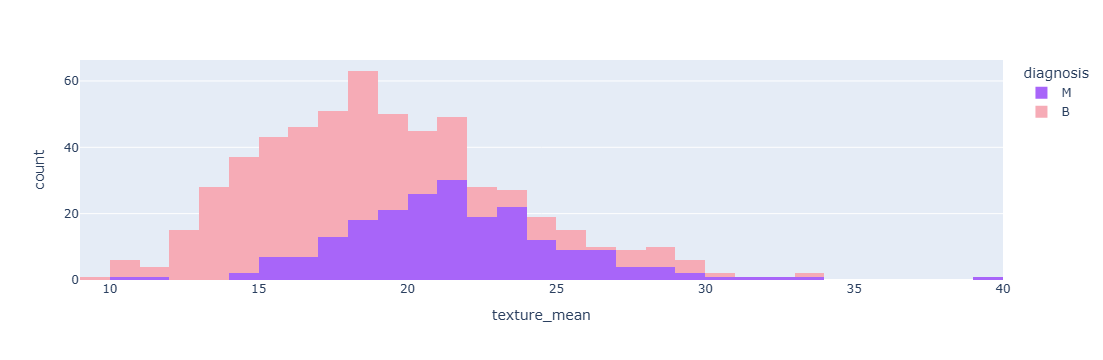

In [12]:
px.histogram(data_frame=df,x='texture_mean',color='diagnosis',color_discrete_sequence=['#A865f9','#f6abb6'])


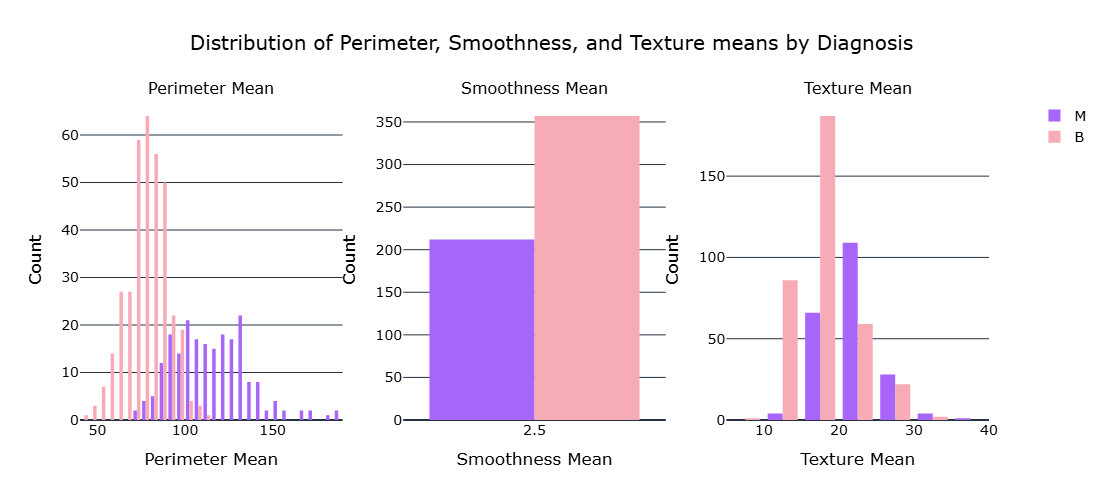

In [18]:
# Create individual histograms
hist1 = px.histogram(df, x='perimeter_mean', color='diagnosis', color_discrete_sequence=['#A865f9', '#f6abb6'])
hist2 = px.histogram(df, x='smoothness_mean', color='diagnosis', color_discrete_sequence=['#A865f9', '#f6abb6'])
hist3 = px.histogram(df, x='texture_mean', color='diagnosis', color_discrete_sequence=['#A865f9', '#f6abb6'])

# Create a 1x3 subplot
fig = make_subplots(rows=1, cols=3, subplot_titles=("Perimeter Mean", "Smoothness Mean", "Texture Mean"))

# Add histograms to the subplot
fig.add_trace(hist1['data'][0], row=1, col=1)
fig.add_trace(hist1['data'][1], row=1, col=1)

fig.add_trace(hist2['data'][0], row=1, col=2)
fig.add_trace(hist2['data'][1], row=1, col=2)

fig.add_trace(hist3['data'][0], row=1, col=3)
fig.add_trace(hist3['data'][1], row=1, col=3)

# Update x-axis and y-axis labels for each subplot
fig.update_xaxes(title_text="Perimeter Mean", row=1, col=1)
fig.update_yaxes(title_text="Count", row=1, col=1)

fig.update_xaxes(title_text="Smoothness Mean", row=1, col=2)
fig.update_yaxes(title_text="Count", row=1, col=2)

fig.update_xaxes(title_text="Texture Mean", row=1, col=3)
fig.update_yaxes(title_text="Count", row=1, col=3)

# Update layout to adjust titles, size, and aesthetics
fig.update_layout(
    height=500, 
    width=1300,  # Width is maintained for appropriate margin
    title_text="Distribution of Perimeter, Smoothness, and Texture means by Diagnosis",
    title_x=0.5,  # Center the main title
    template='plotly_dark',  # Apply a dark theme
    font=dict(
        size=14,
        color="black"
    ),
    legend=dict(
        x=1.05,  # Bring legend closer to the plot
        y=1,  # Position legend at the top
        traceorder="normal",
        bgcolor="rgba(0,0,0,0)",  # Transparent legend background
        bordercolor="rgba(255,255,255,0.3)"
    ),
    margin=dict(r=100),  # Add margin to the right to ensure nothing is cut off
    plot_bgcolor='rgba(0,0,0,0)',  # Transparent plot background
    paper_bgcolor='rgba(0,0,0,0)'  # Transparent overall background
)

# Show legend only for the "Texture Mean" histogram
for i in range(4):
    fig.data[i].showlegend = False

# Show the plot
fig.show()


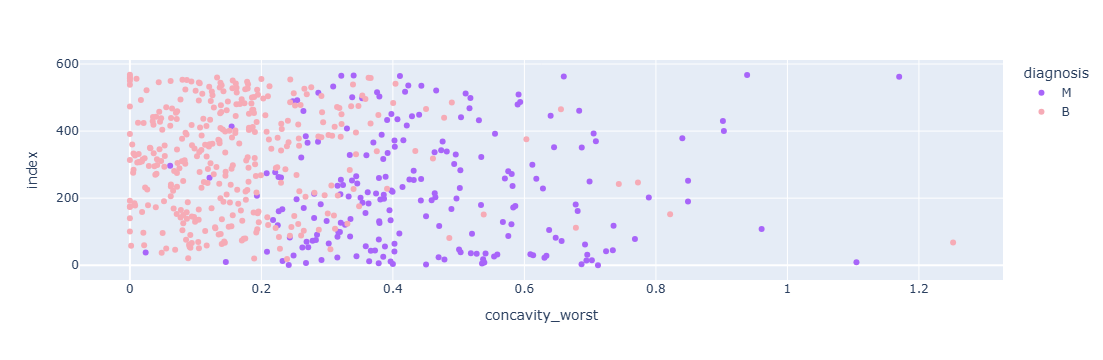

In [14]:
px.scatter(data_frame=df,x='concavity_worst',color='diagnosis',color_discrete_sequence=['#A865f9','#f6abb6'])


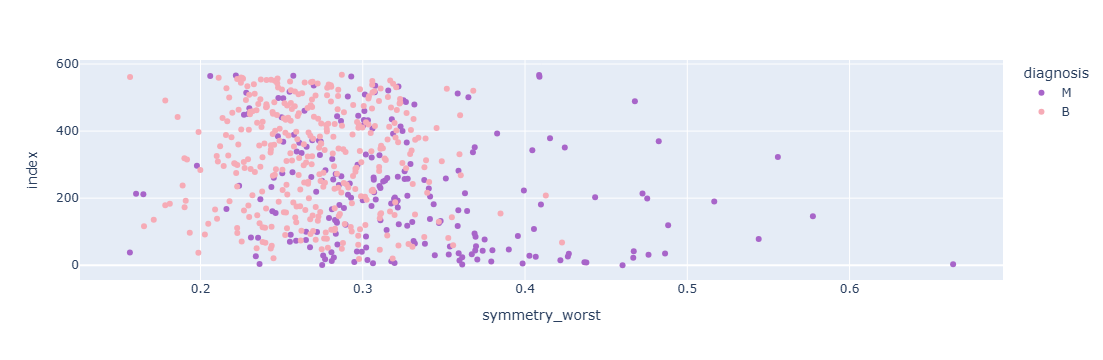

In [15]:
px.scatter(
    data_frame=df,
    x='symmetry_worst',
    color='diagnosis',
    color_discrete_sequence=['#A865C9','#f6abb6'],
)

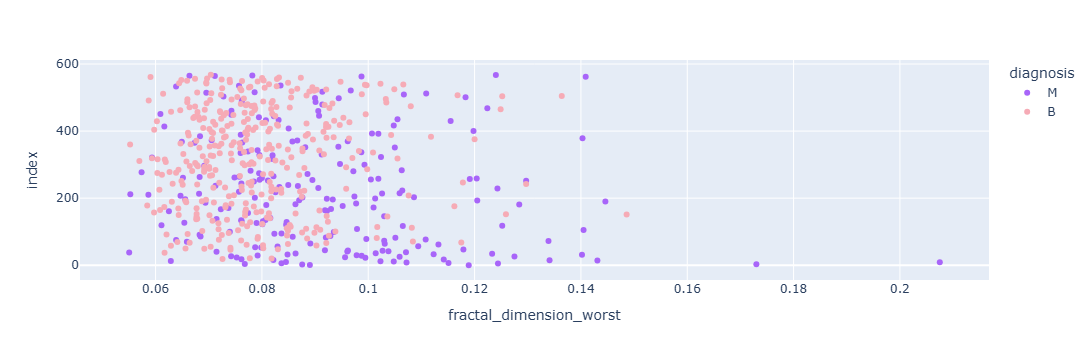

In [16]:
px.scatter(data_frame=df,x='fractal_dimension_worst',color='diagnosis',color_discrete_sequence=['#A865f9','#f6abb6'])


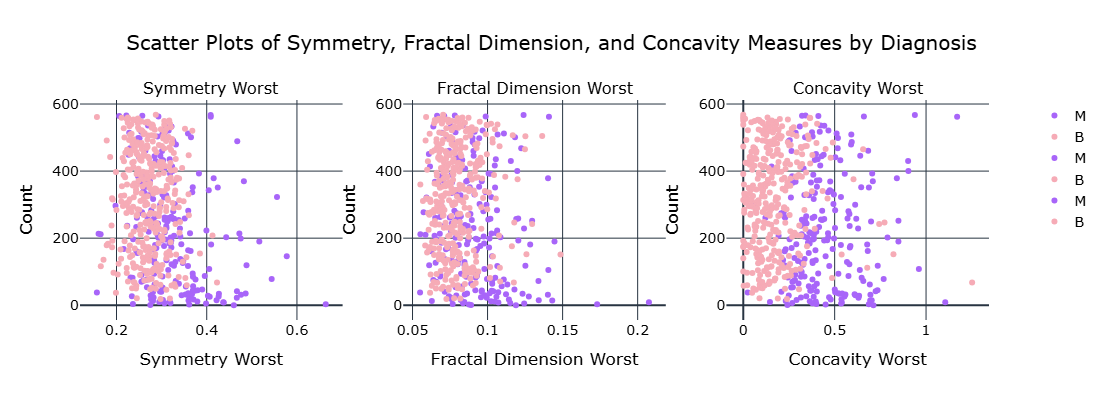

In [19]:
# Create a 1x3 subplot
fig = make_subplots(rows=1, cols=3, subplot_titles=("Symmetry Worst", "Fractal Dimension Worst", "Concavity Worst"))

# Add scatter plot for 'symmetry_worst'
for trace in px.scatter(df, x='symmetry_worst', color='diagnosis', color_discrete_sequence=['#A865f9', '#f6abb6']).data:
    fig.add_trace(trace, row=1, col=1)

# Add scatter plot for 'fractal_dimension_worst'
for trace in px.scatter(df, x='fractal_dimension_worst', color='diagnosis', color_discrete_sequence=['#A865f9', '#f6abb6']).data:
    fig.add_trace(trace, row=1, col=2)

# Add scatter plot for 'concavity_worst'
for trace in px.scatter(df, x='concavity_worst', color='diagnosis', color_discrete_sequence=['#A865f9', '#f6abb6']).data:
    fig.add_trace(trace, row=1, col=3)

# Update x-axis and y-axis labels
fig.update_xaxes(title_text="Symmetry Worst", row=1, col=1)
fig.update_yaxes(title_text="Count", row=1, col=1)

fig.update_xaxes(title_text="Fractal Dimension Worst", row=1, col=2)
fig.update_yaxes(title_text="Count", row=1, col=2)

fig.update_xaxes(title_text="Concavity Worst", row=1, col=3)
fig.update_yaxes(title_text="Count", row=1, col=3)

# Update layout to adjust titles, size, and legends
fig.update_layout(
    height=400,  # Adjust height
    width=1000,  # Adjust width
    title_text="Scatter Plots of Symmetry, Fractal Dimension, and Concavity Measures by Diagnosis",
    title_x=0.5,  # Center the main title
    template='plotly_dark',  # Apply a dark theme
    font=dict(
        size=14,
        color="black"
    ),
    legend=dict(
        x=1.05,  # Bring legend closer to the plot
        y=1,  # Position legend at the top
        traceorder="normal",
        bgcolor="rgba(0,0,0,0)",  # Transparent legend background
        bordercolor="rgba(255,255,255,0.3)"
    ),
    margin=dict(r=100),  # Add margin to the right to ensure nothing is cut off
    plot_bgcolor='rgba(0,0,0,0)',  # Transparent plot background
    paper_bgcolor='rgba(0,0,0,0)'  # Transparent overall background
)

# Show the plot
fig.show()


# Data Pre-processing begins here

In [20]:
df.drop('id', axis=1, inplace=True) 

In [21]:
df['diagnosis'] = (df['diagnosis'] == 'M').astype(int) #encode the label into 1/0

In [22]:
df.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1        17.99         10.38          122.80     1001.0   
1          1        20.57         17.77          132.90     1326.0   
2          1        19.69         21.25          130.00     1203.0   
3          1        11.42         20.38           77.58      386.1   
4          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33           184.60   
1         0.1812  ...         24.99          23.41           158.80   
2         0.2069  ...         23.57          25.53           152.50   
3         0.2597  ...         14.91          26.50            98.87   
4         0.1809  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 31 columns]

**Get highly correlated features with the target**

**As mentioned in this [notebook](https://www.kaggle.com/code/fareselmenshawii/introduction-to-feature-selection) Selecting highly correlated features gives better results**

In [23]:
corr = df.corr()

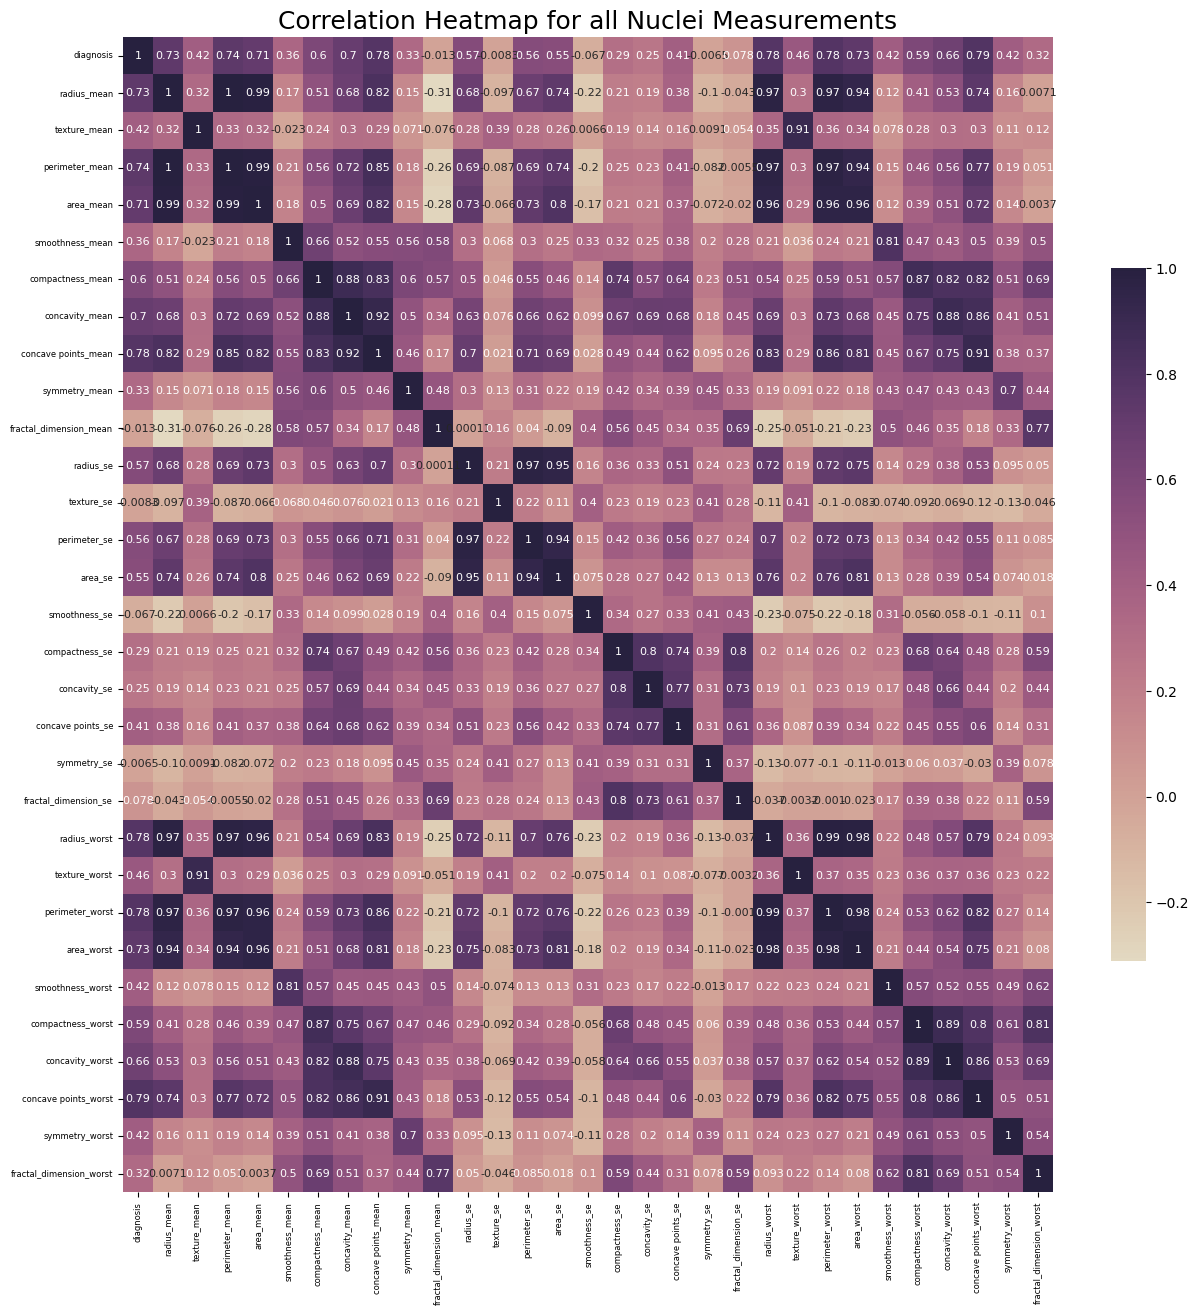

In [25]:
# Set the size of the figure
plt.figure(figsize=(15, 15))  # Reduced size

# Create the heatmap with reduced font sizes
sns.heatmap(
    corr, 
    cmap=sns.color_palette("ch:s=-.2,r=.6", as_cmap=True), 
    annot=True, 
    annot_kws={"size": 8},  # Reduce the annotation font size
    cbar_kws={"shrink": 0.6}  # Shrink the color bar size
)

# Add a title with a reduced font size
plt.title('Correlation Heatmap for all Nuclei Measurements', fontsize=18)

# Reduce the size of the tick labels
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)

# Save the figure with a transparent background
plt.savefig('correlation_heatmap.png', format='png', transparent=True)

# Show the plot
plt.show()


In [26]:
# Get the absolute value of the correlation
cor_target = abs(corr["diagnosis"])

# Select highly correlated features (threshold = 0.2)
relevant_features = cor_target[cor_target > 0.2]

# Collect the names of the features
names = [index for index, value in relevant_features.items()]

# Drop the target variable from the results
names.remove('diagnosis')

In [27]:
X = df[names]
y = df['diagnosis']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42) #split the  data into traing and validating

scaler = StandardScaler() #create an instance of standard scaler
scaler.fit(X_train) # fit it to the training data

scaler.transform(X_train) #transform training data
scaler.transform(X_test) #transform validation data

array([[-0.46649743, -0.13728933, -0.44421138, ..., -0.19435087,
         0.17275669,  0.20372995],
       [ 1.36536344,  0.49866473,  1.30551088, ...,  0.99177862,
        -0.561211  , -1.00838949],
       [ 0.38006578,  0.06921974,  0.40410139, ...,  0.57035018,
        -0.10783139, -0.20629287],
       ...,
       [-0.73547237, -0.99852603, -0.74138839, ..., -0.27741059,
        -0.3820785 , -0.32408328],
       [ 0.02898271,  2.0334026 ,  0.0274851 , ..., -0.49027026,
        -1.60905688, -0.33137507],
       [ 1.87216885,  2.80077153,  1.80354992, ...,  0.7925579 ,
        -0.05868885, -0.09467243]])

# Machine Learning and Deep Learning Modelling 

In [29]:
def train_evaluate_model(model, X_train, y_train, X_test,y_test):
    '''
    Keyword arguments:
    X -- Training data
    y -- Training labels

    returns a dataframe for evaluating metrics
    '''
    
    model.fit(X_train, y_train)  #fit the model instance 


    predictions = model.predict(X_test) # calculate predictions

    #compute metrics for evaluation
    accuracy = accuracy_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    balanced_accuracy = balanced_accuracy_score(y_test, predictions)

    #create a dataframe to visualize the results
    eval_df = pd.DataFrame([[accuracy, f1, precision, recall, balanced_accuracy]], columns=['Accuracy', 'F1_score', 'Precision', 'Recall', 'Balanced_Accuracy'])
    return eval_df

## Logistic Regression

In [30]:
lg = LogisticRegression()

results = train_evaluate_model(lg, X_train, y_train, X_test, y_test)

C:\Users\shiva\anaconda3\envs\math_modeling\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [31]:
results.index = ['Logistic Regression']

In [32]:
results.sort_values(by='F1_score',ascending=False).style.background_gradient(cmap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))


## KNearestNeighbors

In [33]:
KNN = KNeighborsClassifier(n_neighbors=4)

In [34]:
knn = train_evaluate_model(KNN, X_train, y_train, X_test, y_test)
knn.index =['KNearest Neighbors']
results = pd.concat([results, knn])

In [35]:
results.sort_values(by='F1_score',ascending=False).style.background_gradient(cmap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))


## RandomForestClassifer

In [36]:
rfc = RandomForestClassifier()

In [37]:
rfc_result1 = train_evaluate_model(rfc, X_train, y_train, X_test, y_test)
rfc_result1.index = ['Random Forest']

results = pd.concat([results, rfc_result1])

In [38]:
results.sort_values(by='F1_score',ascending=False).style.background_gradient(cmap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))

## Neural Network

In [39]:
initializer = tf.keras.initializers.RandomNormal(seed=0)

def scheduler(epoch, lr):
    if epoch < 50:
        return lr
    else:
        return float(lr * tf.math.exp(-0.3))
    
callback = tf.keras.callbacks.LearningRateScheduler(scheduler)  # set the callback to our scheduler function

inputs = Input(shape=(X.shape[-1],))
x = Dense(16, activation='relu', kernel_initializer=initializer)(inputs)
x = Dropout(0.4)(x)
x = Dense(16, activation='relu', kernel_initializer=initializer)(x)
x = Dropout(0.4)(x)
x = Dense(25, activation='relu', kernel_initializer=initializer)(x)
x = Dense(1, activation='sigmoid', kernel_initializer=initializer)(x)
model = Model(inputs=inputs, outputs=x)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=140, callbacks=[callback])
predictions = model.predict(X_test)


Epoch 1/140
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4210 - loss: 0.7106 - learning_rate: 0.0010
Epoch 2/140
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5154 - loss: 0.6761 - learning_rate: 0.0010
Epoch 3/140
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4166 - loss: 0.6821 - learning_rate: 0.0010
Epoch 4/140
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4760 - loss: 0.6636 - learning_rate: 0.0010
Epoch 5/140
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5751 - loss: 0.6445 - learning_rate: 0.0010
Epoch 6/140
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5171 - loss: 0.6501 - learning_rate: 0.0010
Epoch 7/140
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6589 - loss: 0.6241 - learning_rate: 0.0010
Epoch 8/140
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7285 - loss: 0.6090 - learning_rate: 0.0010
Epoch 9/140
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7868 - loss: 0.5972 - learning_rate: 0.0010
Epoch 10/140
15/15 

In [40]:
# Generate binary predictions for the test data using the trained neural network model
predictions = model.predict(X_test)
# convert predicted probabilities to binary predictions Note that a threshold of 0.4 was used as recall is more important for medical diagnosis
predictions = (predictions > 0.4) 

# Calculate evaluation metrics using the binary predictions and true labels for the test data
accuracy = accuracy_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
balanced_accuracy = balanced_accuracy_score(y_test, predictions)

# Create a pandas dataframe containing the evaluation metric values as a single row
nn_df = pd.DataFrame([[accuracy, f1, precision, recall, balanced_accuracy]], 
                     columns=['Accuracy', 'F1_score', 'Precision', 'Recall', 'Balanced_Accuracy'])


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [41]:
nn_df.index = ['Neural Network']
results =  pd.concat([results, nn_df])

In [43]:
results.sort_values(by='F1_score',ascending=False).style.background_gradient(cmap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))

In [44]:
#!pip install dataframe-image
import seaborn as sns
import dataframe_image as dfi

# Assuming 'results' is your DataFrame
styled_df = results.sort_values(by='F1_score', ascending=False).style.background_gradient(cmap=sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))

# Save the styled DataFrame as a PNG image
dfi.export(styled_df, 'styled_table.png')


# Model Evaluation

In [48]:
models = results.T.columns.values
models= models[0:4]

In [49]:
models

array(['Logistic Regression', 'KNearest Neighbors', 'Random Forest',
       'Neural Network'], dtype=object)

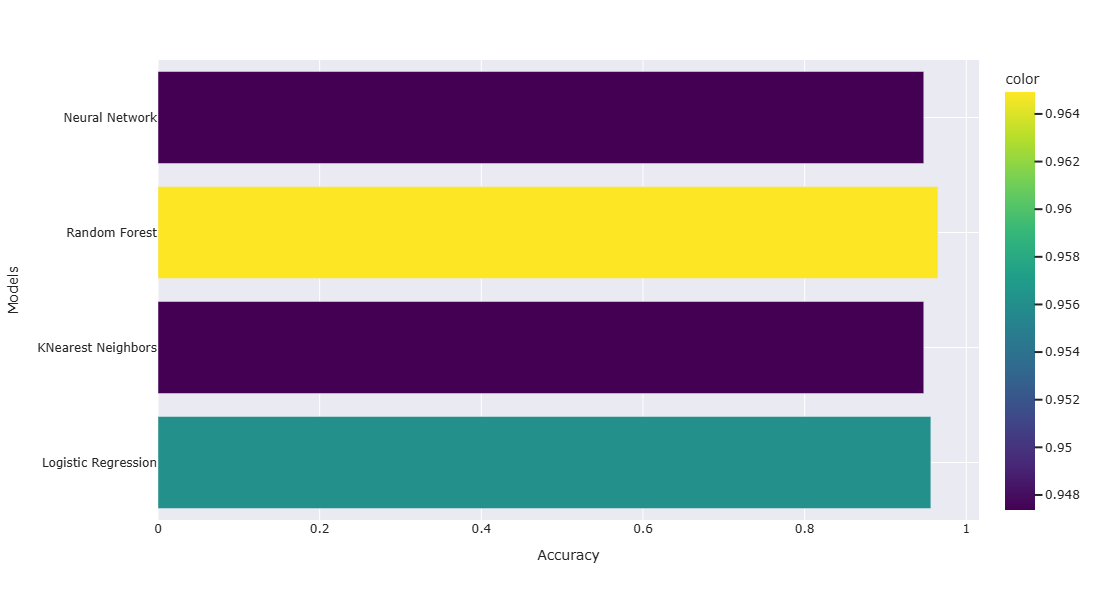

In [50]:
fig = px.bar(x=results.iloc[:7,0].values, y =models,orientation='h',color=results['Accuracy'].iloc[:7],color_continuous_scale='viridis',
            template="seaborn")

fig.update_layout(width=800, height=600,
                 xaxis=dict(title='Accuracy'),
                 yaxis=dict(title="Models"))

fig.show()

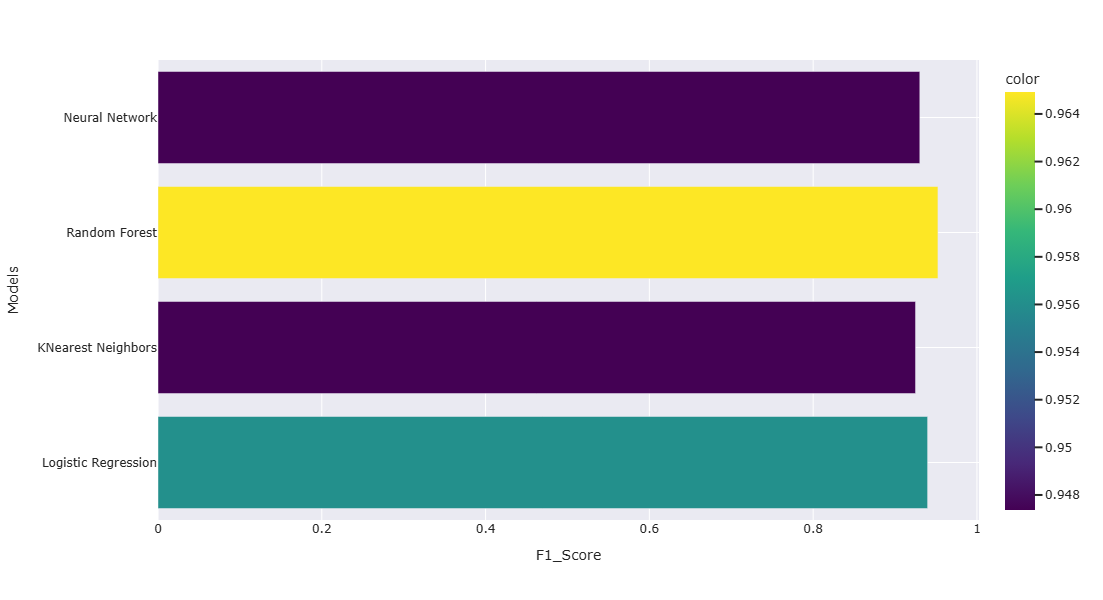

In [51]:
fig = px.bar(x=results.iloc[:7,1].values, y =models,orientation='h',color=results['Accuracy'].iloc[:7],color_continuous_scale='viridis',
            template="seaborn")

fig.update_layout(width=800, height=600,
                 xaxis=dict(title='F1_Score'),
                 yaxis=dict(title="Models"))

fig.show()

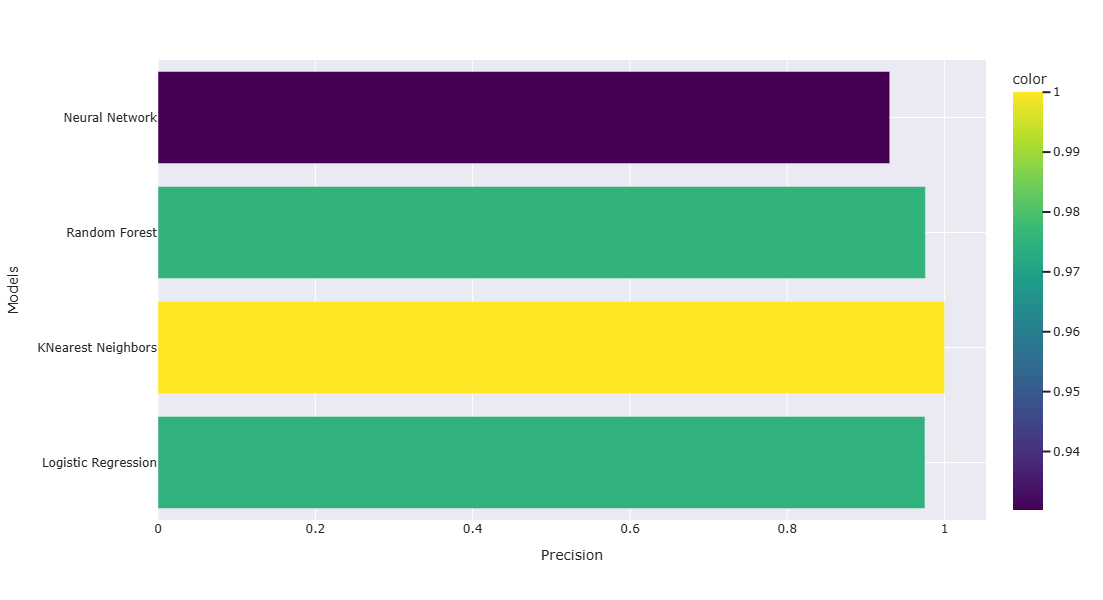

In [52]:
fig = px.bar(x=results.iloc[:7,2].values, y =models,orientation='h',color=results['Precision'].iloc[:7],color_continuous_scale='viridis',
            template="seaborn")

fig.update_layout(width=800, height=600,
                 xaxis=dict(title='Precision'),
                 yaxis=dict(title="Models"))

fig.show()

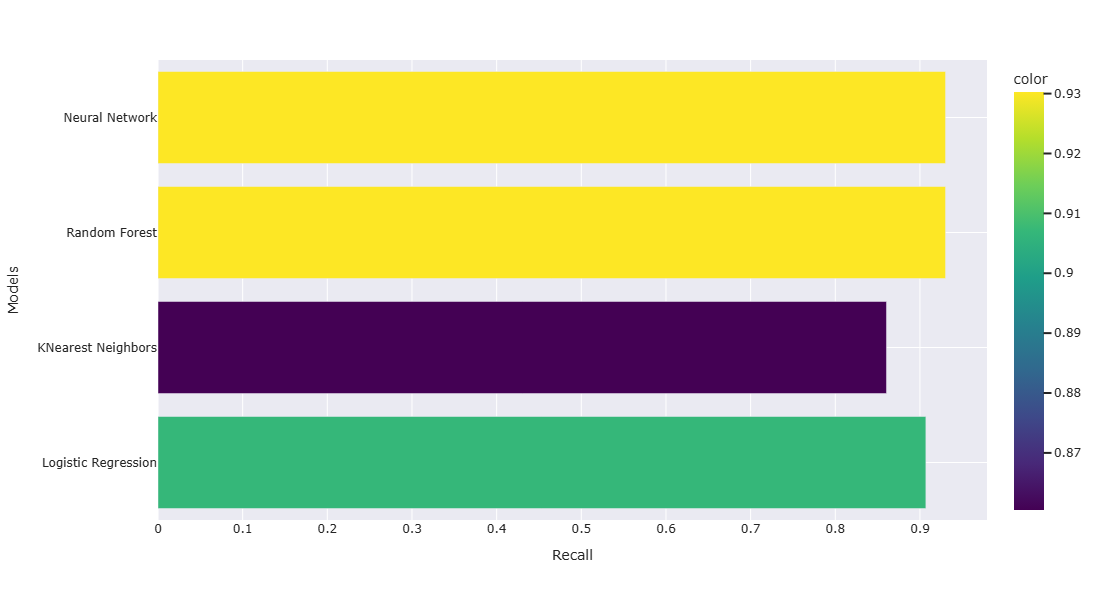

In [53]:
fig = px.bar(x=results.iloc[:7,3].values, y =models,orientation='h',color=results['Recall'].iloc[:7],color_continuous_scale='viridis',
            template="seaborn")

fig.update_layout(width=800, height=600,
                 xaxis=dict(title='Recall'),
                 yaxis=dict(title="Models"))

fig.show()

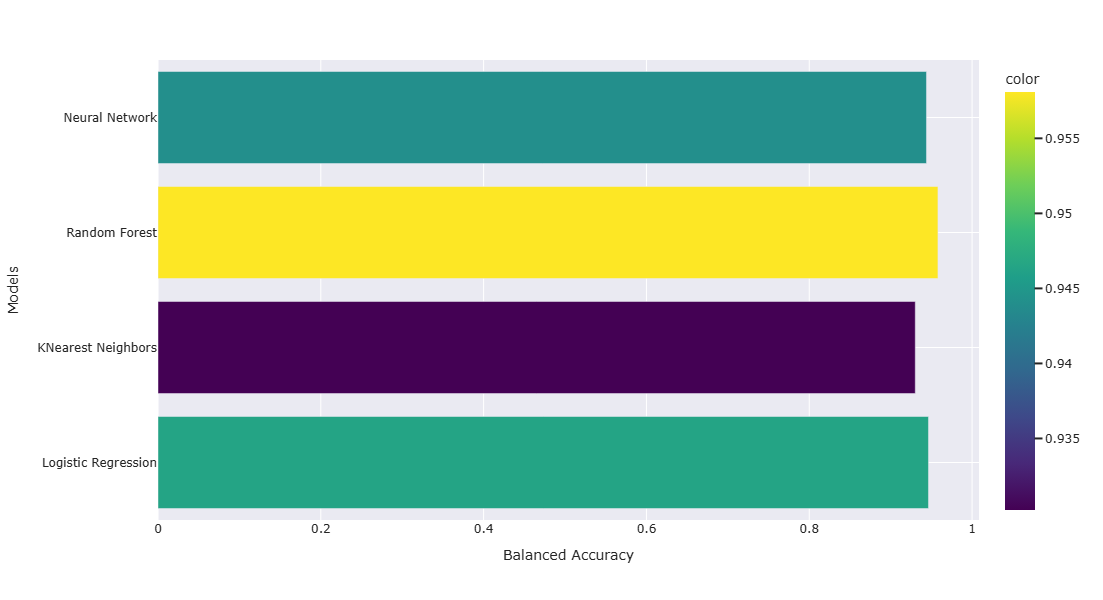

In [54]:
fig = px.bar(x=results.iloc[:7,4].values, y =models,orientation='h',color=results['Balanced_Accuracy'].iloc[:7],color_continuous_scale='viridis',
            template="seaborn")

fig.update_layout(width=800, height=600,
                 xaxis=dict(title='Balanced Accuracy'),
                 yaxis=dict(title="Models"))

fig.show()

# Conclusion

**Random Forest classifier outperforms the other models across most metrics, including Accuracy, F1_score, Precision, Recall, and Balanced Accuracy. Specifically, it achieves the highest Accuracy (0.964912) and F1_score (0.952381), indicating a strong overall performance. The Random Forest model also maintains a good balance between Precision and Recall, making it the most reliable option among the models tested.**

**The Logistic Regression model is a close second, particularly excelling in Precision (0.975000), but it slightly lags behind in Recall (0.906977), which affects its overall F1_score and Balanced Accuracy.**

**The Neural Network and KNearest Neighbors models perform similarly, with the Neural Network showing balanced performance across Precision and Recall, while KNearest Neighbors achieves perfect Precision (1.000000) at the expense of a lower Recall (0.860465).**

**In summary, the Random Forest model is the best choice for classifying breast cancer, and the most explainable model, providing the most consistent and robust performance across all evaluated metrics.**